In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
bankdata = pd.read_csv("bank.csv", sep=";")
df_bankdata = pd.DataFrame(bankdata)

In [3]:
# Displaying the first few rows of the dataset
df_bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df_bankdata.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
df_bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
df_bankdata.shape

(4521, 17)

In [7]:
df_bankdata.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# Importing the necessary Libraries

# data quality
from data_quality_tests import DataQuality 

In [9]:
# Initialize DataQuality with df_bankdata and execute its data_quality_check() method
# This generates a summary of issues like missing values, duplicates, and datatype problems
DataQuality(df_bankdata).data_quality_check()

Note:
Fail - Failed for test case due to existing condition.
Pass - Clear of condition.

Number of rows:  4521

Test Case Null Values: Pass

Test Case Duplicated Values: Pass

Test Case Column Data Type Matches Values In Column: Pass

Test Case Column Header Whitespaces: Pass



In [10]:
# Get column names
df_bankdata.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
df_bankdata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [12]:
# Target variable : poutcome
df_bankdata.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [13]:
df_bankdata.poutcome.value_counts()

poutcome
unknown    3705
failure     490
other       197
success     129
Name: count, dtype: int64

In [14]:
# Normalize can be set to True to print proportions instead of number
df_bankdata.poutcome.value_counts(normalize=True)

poutcome
unknown    0.819509
failure    0.108383
other      0.043574
success    0.028534
Name: proportion, dtype: float64

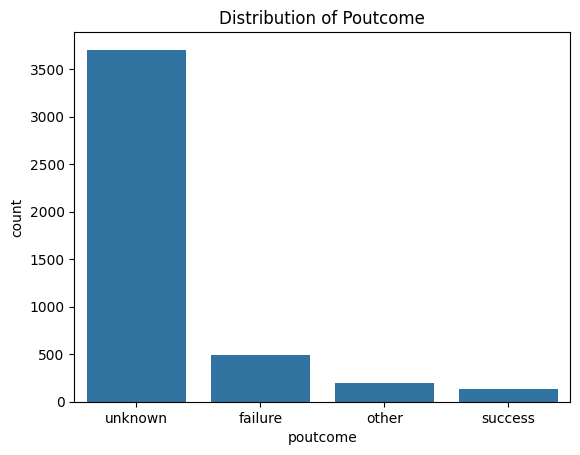

In [15]:
# Visualizing the target variable distribution
sns.countplot(
    x=df_bankdata.poutcome,
)
plt.title("Distribution of Poutcome")
plt.show()

2. Independent Attributes


1. Numerical Attribute: age


In [16]:
df_bankdata.age.describe()

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64

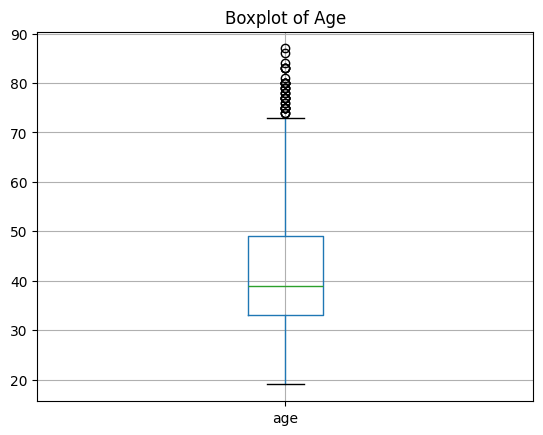

In [17]:
df_bankdata.boxplot(column="age")
plt.title("Boxplot of Age")
plt.show()

<Axes: xlabel='age', ylabel='Count'>

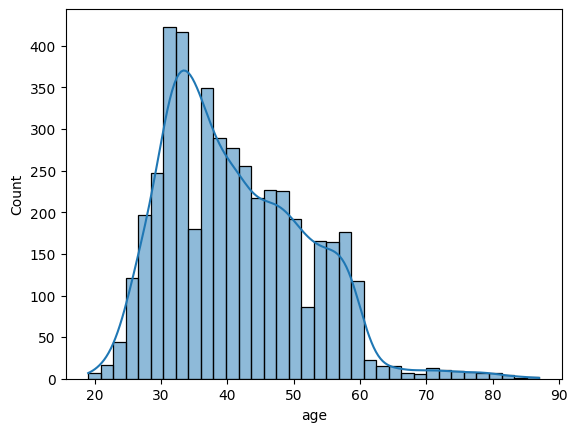

In [18]:
sns.histplot(
    data=df_bankdata,
    x="age",
    kde=True,
)

2. Numerical Attribute: balance


In [19]:
df_bankdata.balance.describe()

count     4521.000000
mean      1422.657819
std       3009.638142
min      -3313.000000
25%         69.000000
50%        444.000000
75%       1480.000000
max      71188.000000
Name: balance, dtype: float64

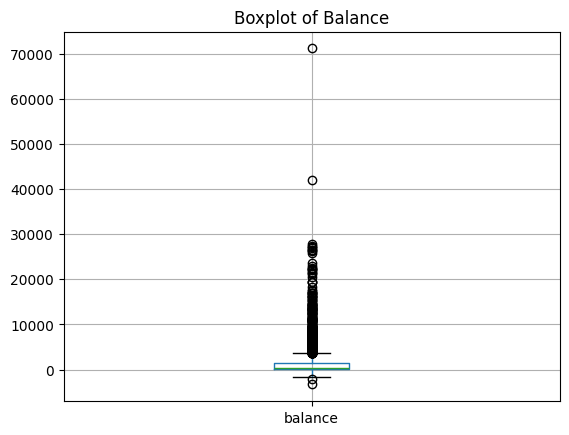

In [20]:
df_bankdata.boxplot(column="balance")
plt.title("Boxplot of Balance")
plt.show()

<Axes: xlabel='balance', ylabel='Count'>

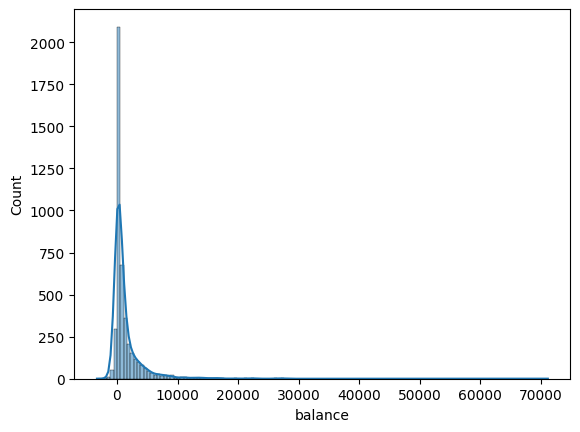

In [21]:
sns.histplot(data=df_bankdata, x="balance", kde=True)

3. Numerical Attribute: day


In [22]:
df_bankdata.day.describe()

count    4521.000000
mean       15.915284
std         8.247667
min         1.000000
25%         9.000000
50%        16.000000
75%        21.000000
max        31.000000
Name: day, dtype: float64

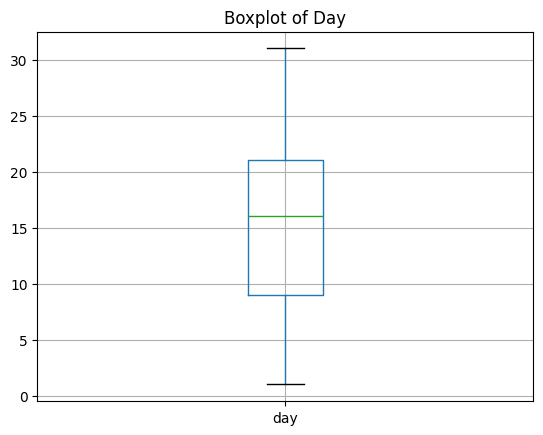

In [23]:
df_bankdata.boxplot(column="day")
plt.title("Boxplot of Day")
plt.show()

<Axes: xlabel='day', ylabel='Count'>

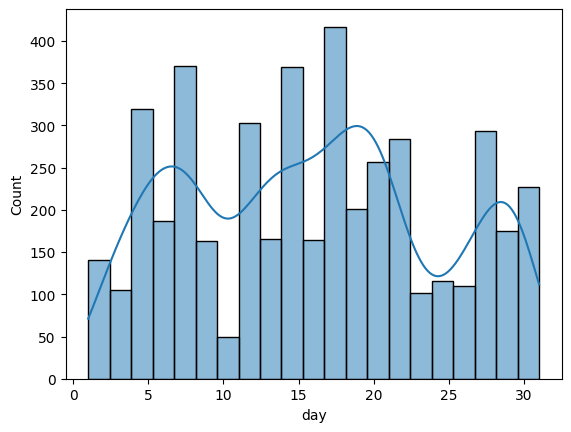

In [24]:
sns.histplot(
    data=df_bankdata,
    x="day",
    kde=True,
)

4. Numerical Attribute: duration


In [25]:
df_bankdata.duration.describe()

count    4521.000000
mean      263.961292
std       259.856633
min         4.000000
25%       104.000000
50%       185.000000
75%       329.000000
max      3025.000000
Name: duration, dtype: float64

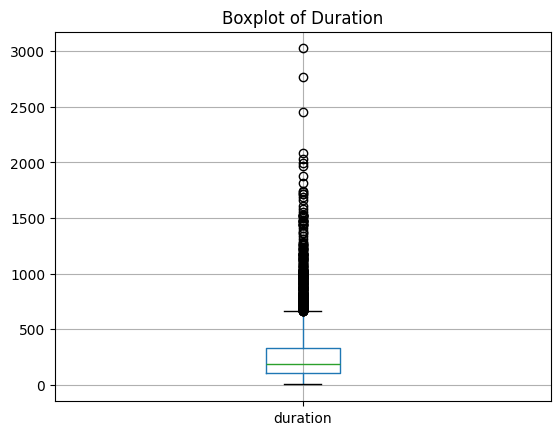

In [26]:
df_bankdata.boxplot(column="duration")
plt.title("Boxplot of Duration")
plt.show()

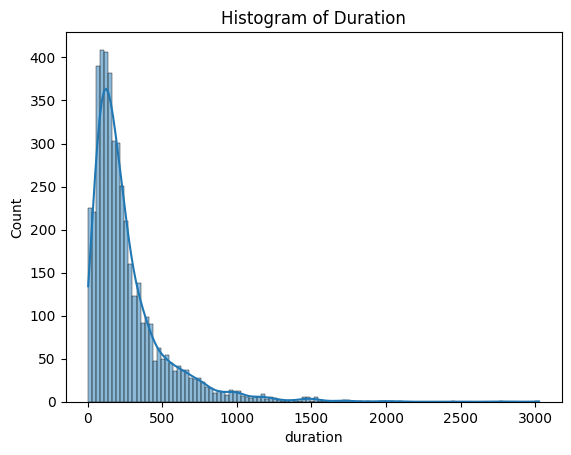

In [27]:
sns.histplot(
    data=df_bankdata,
    x="duration",
    kde=True,
)
plt.title("Histogram of Duration")
plt.show()

5. Numerical Attribute: campaign


In [28]:
df_bankdata.campaign.describe()

count    4521.000000
mean        2.793630
std         3.109807
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        50.000000
Name: campaign, dtype: float64

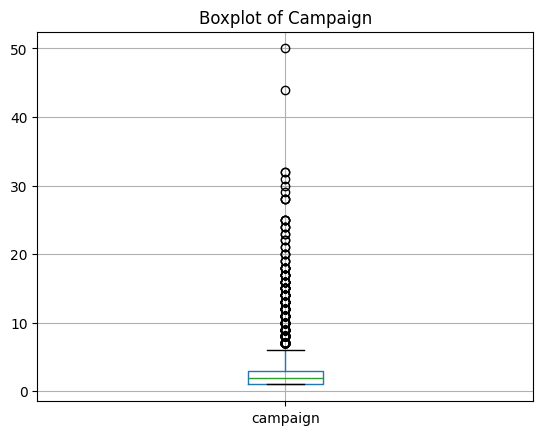

In [29]:
df_bankdata.boxplot(column="campaign")
plt.title("Boxplot of Campaign")
plt.show()

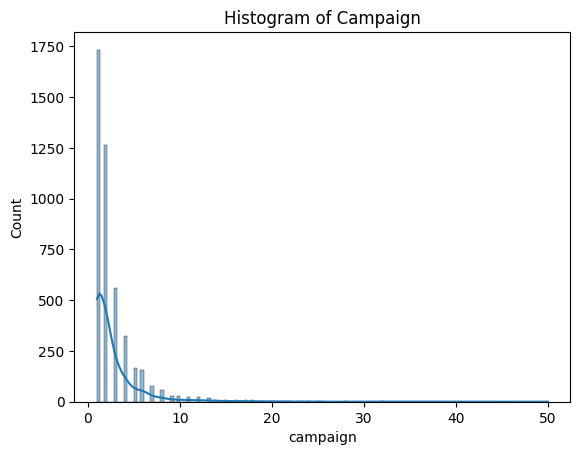

In [30]:
sns.histplot(
    data=df_bankdata,
    x="campaign",
    kde=True,
)
plt.title("Histogram of Campaign")
plt.show()

6. Numerical Attribute: pdays


In [31]:
df_bankdata.pdays.describe()

count    4521.000000
mean       39.766645
std       100.121124
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       871.000000
Name: pdays, dtype: float64

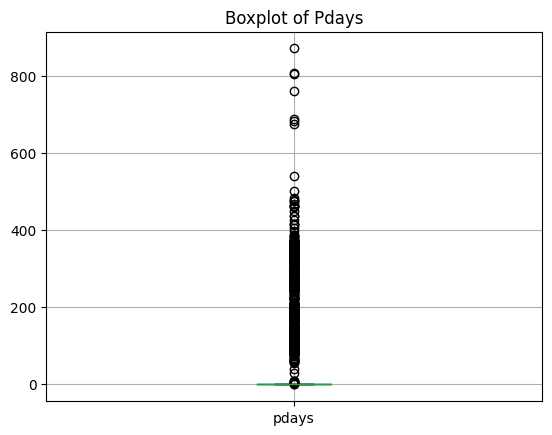

In [32]:
df_bankdata.boxplot(column="pdays")
plt.title("Boxplot of Pdays")
plt.show()

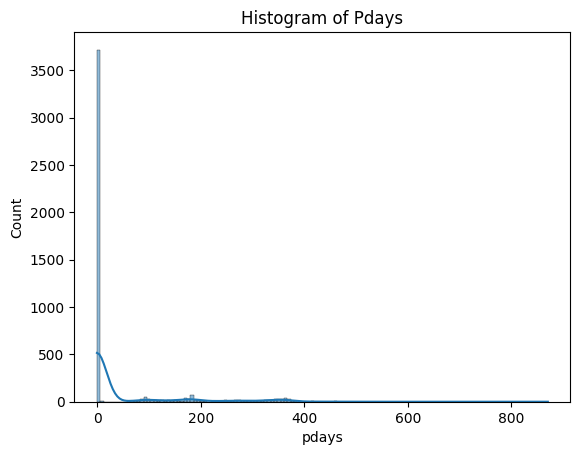

In [33]:
sns.histplot(
    data=df_bankdata,
    x="pdays",
    kde=True,
)
plt.title("Histogram of Pdays")
plt.show()

7. Numerical Attribute: previous

In [34]:
df_bankdata.previous.describe()

count    4521.000000
mean        0.542579
std         1.693562
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        25.000000
Name: previous, dtype: float64

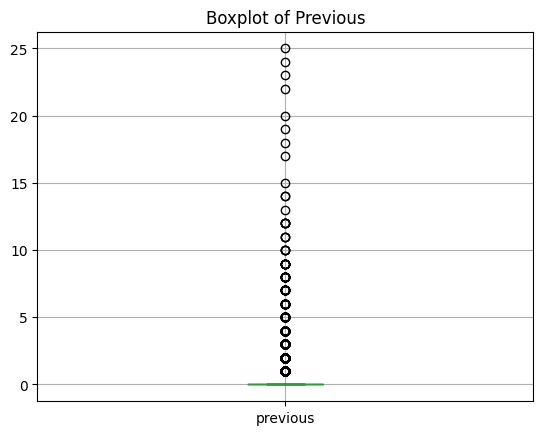

In [35]:
df_bankdata.boxplot(column="previous")
plt.title("Boxplot of Previous")
plt.show()

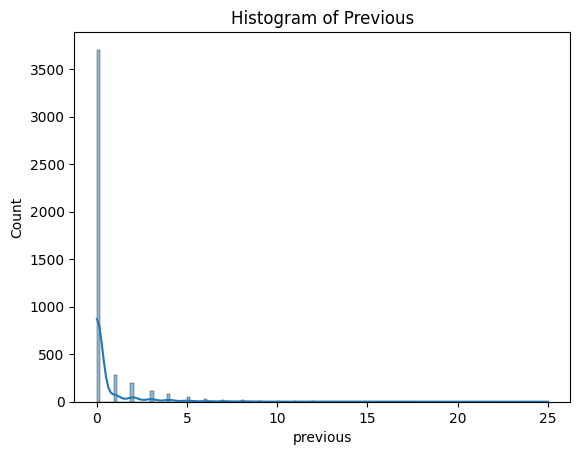

In [36]:
sns.histplot(
    data=df_bankdata,
    x='previous',
    kde=True,
)
plt.title('Histogram of Previous')
plt.show()